In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


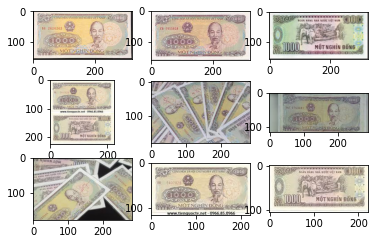

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

folder= '/content/drive/MyDrive/Colab Notebooks/Train_AI/Tien/'
for i in range(9):
  plt.subplot(330+i+1)
  filename = folder+'1k_'+str(i+1)+'.jpg'
  image = imread(filename)
  plt.imshow(image)
plt.show()

In [ ]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img, img_to_array

folder= '/content/drive/MyDrive/Colab Notebooks/Train_AI/Tien/'

photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('1k'):
    output = 0
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('2k'):
    output = 1
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('5k'):
    output = 2
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('10k'):
    output = 3
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('20k'):
    output = 4
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('50k'):
    output = 5
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

photos = asarray(photos)
labels = asarray(labels)
print(photos.shape,labels.shape)

save('11TienGiay_photos.npy', photos)
save('11TienGiay_labels.npy', labels)

(80, 200, 200, 3) (80,)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten # BatchNormalization: để dùng GPU ko lỗi
from tensorflow.keras.optimizers import SGD

model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2)),
    
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(64, activation='relu'),
    Dense(11, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
 history = model.fit(photos, labels, epochs=20, verbose=1)

Epoch 1/20
3/3 [==============================] - 6s 1s/step - loss: 1648.1711 - accuracy: 0.1375
Epoch 2/20
3/3 [==============================] - 4s 1s/step - loss: 1335.1217 - accuracy: 0.1750
Epoch 3/20
3/3 [==============================] - 4s 1s/step - loss: 359.9164 - accuracy: 0.4375
Epoch 4/20
3/3 [==============================] - 4s 1s/step - loss: 48.2585 - accuracy: 0.5625
Epoch 5/20
3/3 [==============================] - 4s 1s/step - loss: 0.8899 - accuracy: 0.8500
Epoch 6/20
3/3 [==============================] - 4s 1s/step - loss: 1.9285 - accuracy: 0.9750
Epoch 7/20
3/3 [==============================] - 4s 1s/step - loss: 0.3374 - accuracy: 0.9875
Epoch 8/20
3/3 [==============================] - 4s 1s/step - loss: 0.0017 - accuracy: 1.0000
Epoch 9/20
3/3 [==============================] - 4s 1s/step - loss: 0.2900 - accuracy: 0.9750
Epoch 10/20
3/3 [==============================] - 4s 1s/step - loss: 0.7939 - accuracy: 0.9125
Epoch 11/20
3/3 [=======================

In [ ]:
model.evaluate(photos,labels)

3/3 [==============================] - 1s 321ms/step - loss: 5.4817e-04 - accuracy: 1.0000


[0.0005481655243784189, 1.0]

In [ ]:
model.save('TienGiay_Final.h5')

In [ ]:
from keras.models import load_model
models=load_model('TienGiay_Final.h5')

In [ ]:
classes = ["1k","2k","5k","10k","20k","50k"]

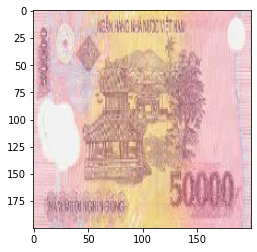

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

img = load_img('50k_2.jpg', target_size=(200,200))
plt.imshow(img)

In [ ]:
import numpy as np
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,200,200,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

[[0.10370281 0.09740386 0.09783988 0.09861442 0.08225625 0.11009596
  0.08346067 0.07444613 0.0685692  0.09150198 0.09210887]]


'50k'